# Data Pre-Processing

#### Import Packages and CSV

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
# Print shape of dataset
print(df.shape)

(5110, 12)


In [75]:
# First 5 rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

#### Check Null Values

In [76]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

bmi 3.93346 % missing values


**What does NaN mean?**

**Ans:** Missing Values in a DataFrame

**Why might a value be missing?** 

**Ans:** When considering the potential impact of the missing data on the Dataset, it is important to consider the underlying reasons for why the data are missing
Missing data are of three categories:
* Missing completely at random (MCAR)
* Missing at random (MAR).
* Missing not at random (MNAR). 

Here it is MCAR type of missing values in dataset which are Missing completely at Random. 

When we make this assumption, we are assuming the missing data is completely unrelated to the other information in the data.

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [77]:
# Checking for duplicates
df.duplicated().sum()

0

**Remove ID from the dataset as it cannot used in Model Training**

**As a Report form the EDA we can drop `gender` and `Resident_type` as well**

In [78]:
df.drop(['id', 'gender', 'Residence_type'], inplace=True, axis=1)

# Feature Engineering

### Type of Features

**Numeric Features**

In [79]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(numeric_features))
numeric_features

Num of Numerical Features : 6


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

**Categorical Features**

In [80]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(categorical_features))
categorical_features

Num of Categorical Features : 3


['ever_married', 'work_type', 'smoking_status']

**Discrete Features**

In [81]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25)]
print('Num of Discrete Features :',len(discrete_features))
discrete_features

Num of Discrete Features : 3


['hypertension', 'heart_disease', 'stroke']

**Continuous features**

In [82]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Num of Continuous Features :',len(continuous_features))
continuous_features

Num of Continuous Features : 3


['age', 'avg_glucose_level', 'bmi']

**Imputing Null Values to Check VIF(Multi-Collinearity)**

In [83]:
# Create copy of dataframe to check variance inflation factor
df1 = df.copy()
for i in continuous_features:
    df1[i].fillna(df1[i].median(), inplace=True)

### Multicollinearity Check
#### Variance Inflation Factor (VIF)

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [85]:
compute_vif(continuous_features, df1)

,Variable,VIF
0,age,1.162810
1,avg_glucose_level,1.070325
2,bmi,1.128268


 ” VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable “ 

VIF above 5 is indicator of Multicollinearity  

**- This Dataset Doesnt have any Multicollinearity**

### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

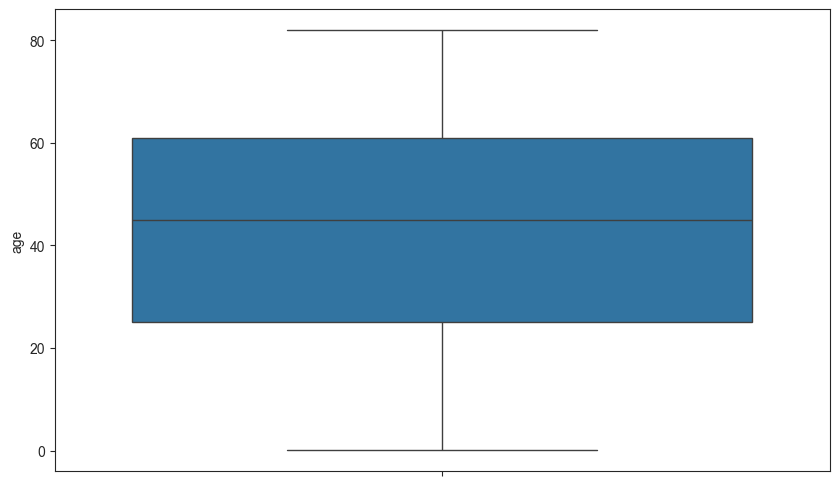

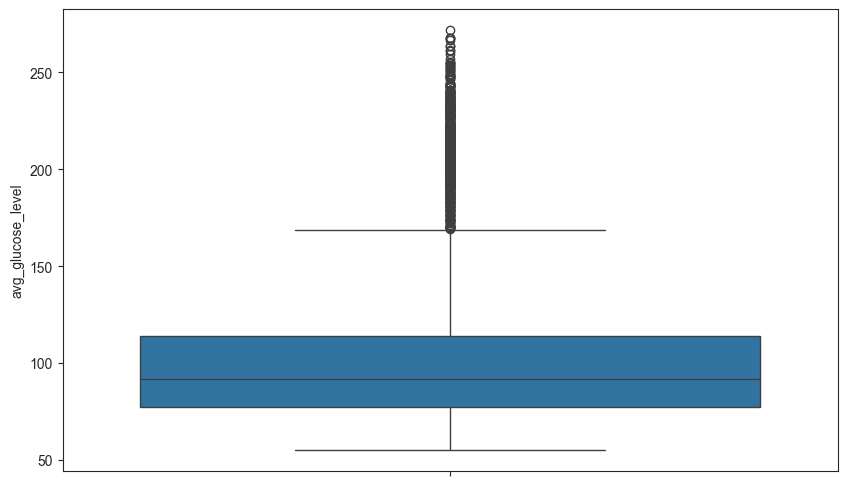

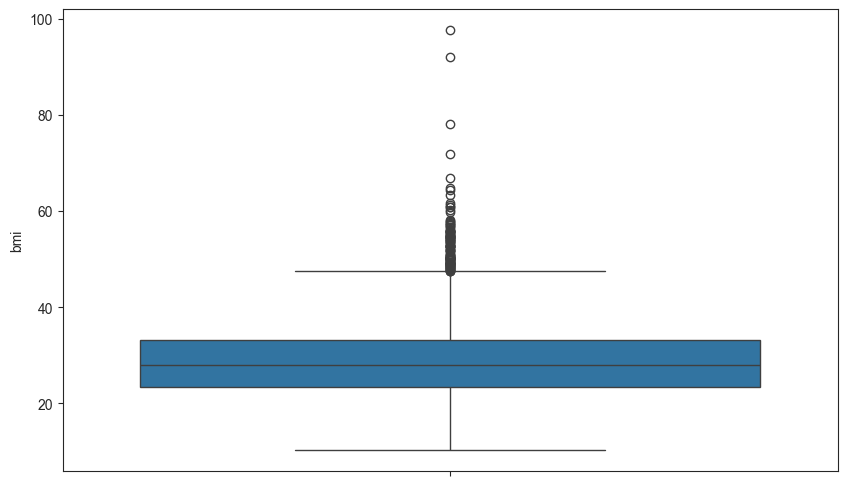

In [86]:
for i in continuous_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

**Standard deviation method For Outlier Handling?**

- Outlier removal using standard deviation procedure.
- Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method.
- Here we can remove outliers after 3rd standard deviation or z-score +3 and -3. used to remove only extreme outlier points

In [87]:
def outlier_removal(column, df):
    upper_limit = df[column].mean() + 3*df[column].std()
    lower_limit = df[column].mean() - 3*df[column].std()
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [88]:
df.shape

(5110, 9)

In [89]:
outlier_feature = ['bmi']

In [90]:
for i in range(len(outlier_feature)):
    df = outlier_removal(outlier_feature[i], df)

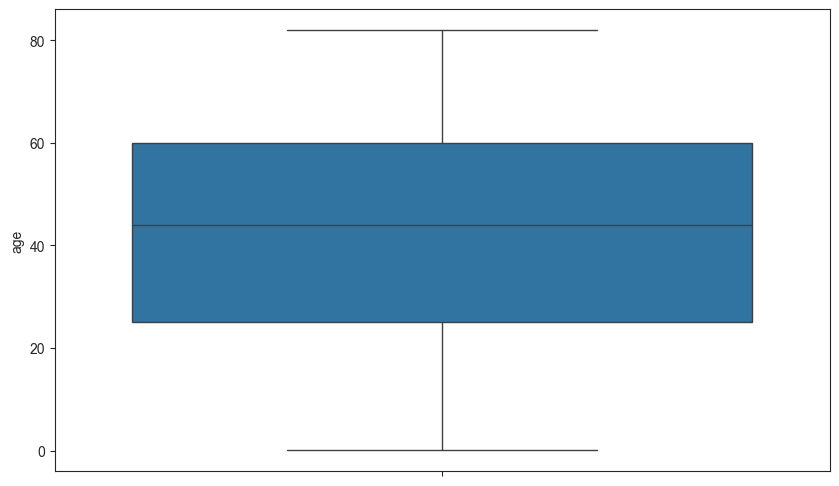

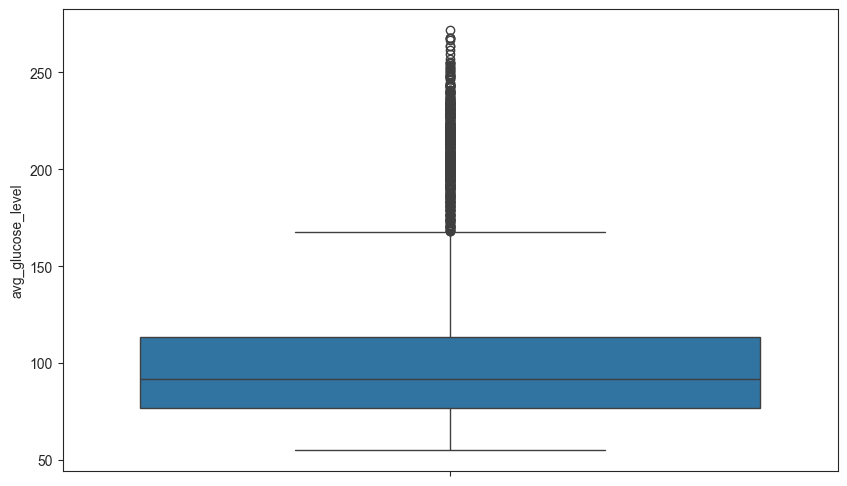

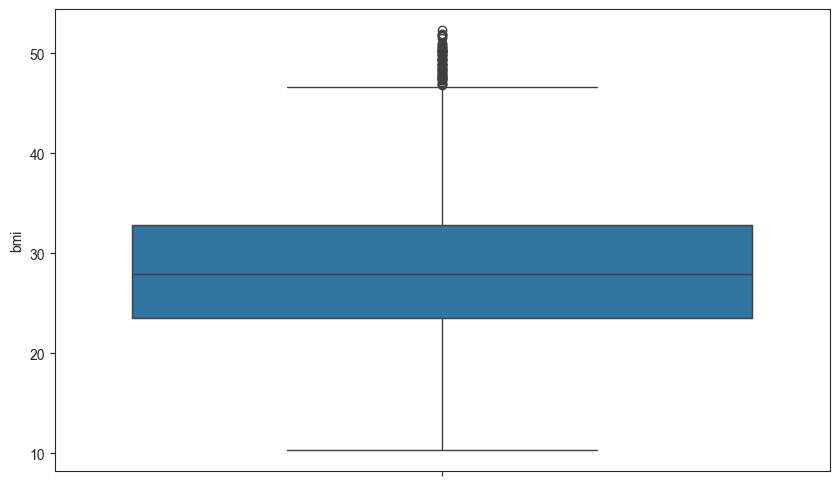

In [91]:
for i in continuous_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [92]:
df.shape

(4851, 9)

## Feature Transformation

In [93]:
df[continuous_features].skew(axis=0)

age                 -0.115593
avg_glucose_level    1.626970
bmi                  0.466922
dtype: float64

* **If Skewness is above 2 then the feature is Highly skewed**
* **If Skewness is above 1.5 then the feature is Moderately skewed**

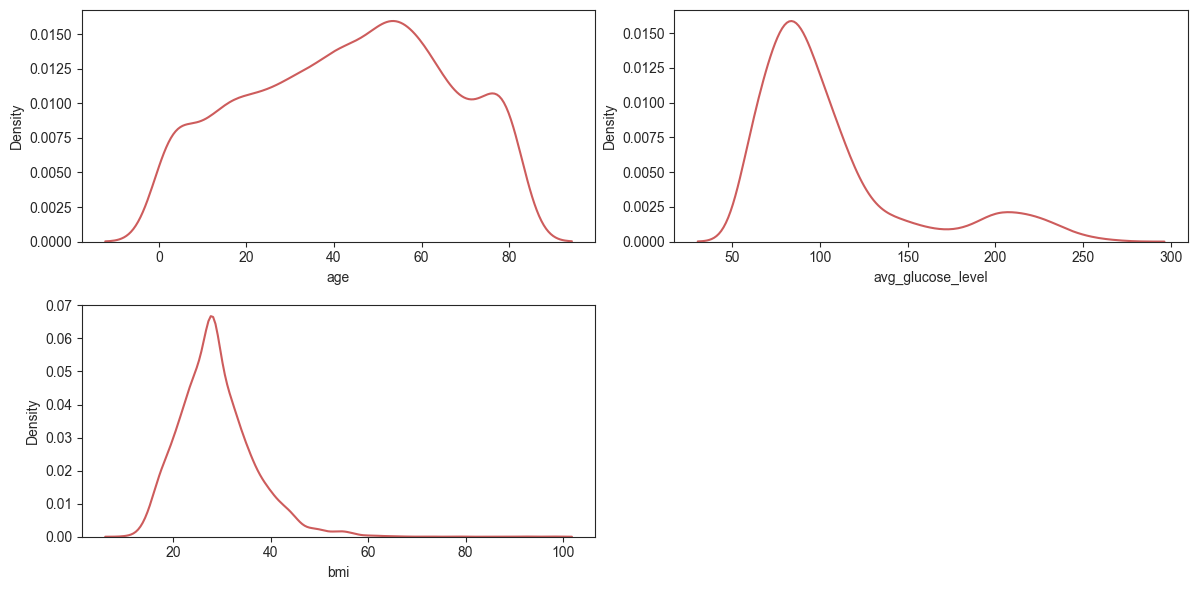

In [94]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df1[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

- **Here `avg_glucose_level` is slightly skewed**
- **`age` column have kutosis and it is platykurtic**
- **`bmi` is normally distributed with very little data on the tails**

### Split X and Y

In [95]:
from sklearn.model_selection import train_test_split
X = df.drop(['stroke'], axis=1)
y = df['stroke']

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the `stroke` column.**


In [96]:
for feature in categorical_features:
    print(feature,':', X[feature].nunique())

ever_married : 2
work_type : 5
smoking_status : 4


## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [97]:
for i in continuous_features:
    print(f'{i}: mean = {df[i].mean():.2f}, median = {df[i].median():.2f}')

age: mean = 42.83, median = 44.00
avg_glucose_level: mean = 105.10, median = 91.68
bmi: mean = 28.54, median = 27.90


There are no missing values in `age` and `avg_glucose_level` and only `bmi` column should be handled. Based on the above result we can inpute the column with either mean or median. We can go with median imputation since it is robust than mean imputer.

* **Mean imputer:** Since we handeled outlier for the continuous features the mean and median of the features are nearly same. When there are no outliers mean performs an a better imputer.
* **Standardscaler:** As the features distribution are nearly normal we use standard scaler.
* **Power Transformer:** Since avg_glucose_level are skewed we use Power Transformer on them

In [98]:
# Create Column Transformer with 3 types of transformers
categorical_features = X.select_dtypes(include="object").columns
num_feature = numeric_features.copy()
num_feature.remove('stroke')
transform_features=['avg_glucose_level']


from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one_hot_encoder', OneHotEncoder()),
    ('scaler', StandardScaler(with_mean=False))
]
)

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(standardize=True))
])

preprocessor = ColumnTransformer(
    [
        ("numeric_Pipeline",numeric_pipeline,num_feature),
        ("Categorical_Pipeline",categorical_pipeline, categorical_features),
        ("Power_Transformation", transform_pipe, transform_features)
]
)

In [99]:
X= preprocessor.fit_transform(X)

## Handling Imbalanced Dataset

* Handling Imbalanced Target Variable.
* Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model.

* SMOTE is one of the famous oversampling techniques and is very effective in handling class imbalance. The idea is to combine SMOTE with some undersampling techniques (ENN, Tomek) to increase the effectiveness of handling the imbalanced class.

 **SMOTE+ENN** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
This method combines the SMOTE ability to generate synthetic data for minority class and uses ENN to remove overlapping observation of both the classes
 
 - **To add new data of minority class**
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - **To remove the data points of both classes**
 1. Determine K, as the number of nearest neighbors. If not determined, then K=3.
 2. Find the K-nearest neighbor of the observation among the other observations in the dataset, then return the majority class from the K-nearest neighbor.
 3. If the class of the observation and the majority class from the observation’s K-nearest neighbor is different, then the observation and its K-nearest neighbor are deleted from the dataset.
 4. Repeat step 2 and 3 until the desired proportion of each class is fulfilled.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [100]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Model Selection
* **Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning**

## Train Test Split

* The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

* It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

**Import Required packages for model training**

In [101]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [102]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [103]:
# Initialize models which are required for models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [104]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Evaluate all base Models

In [105]:
base_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9810
- F1 score: 0.9819
- Precision: 0.9714
- Recall: 0.9927
- Roc Auc Score: 0.9805


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9367
- F1 score: 0.9400
- Precision: 0.9266
- Recall: 0.9537
- Roc Auc Score: 0.9360


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9247
- F1 score: 0.9301
- Precision: 0.9107
- Recall: 0.9504
- Roc Auc Score: 0.9233
----------------------------------
Model performance for Test set
- Accuracy: 0.9088
- F1 score: 0.9156
- Precision: 0.8825
- Recall: 0.9513
- Roc Auc Score: 0.9070


Logistic Regression
Model performance for Training 

In [106]:
base_report

,Model Name,Accuracy
0,Random Forest,0.981001
5,XGBClassifier,0.973401
4,K-Neighbors Classifier,0.972134
6,CatBoosting Classifier,0.965801
1,Decision Tree,0.936669
2,Gradient Boosting,0.908803
7,AdaBoost Classifier,0.877137
3,Logistic Regression,0.858771


**Here we can use Random Forest , XGBoost Classifier, CatBoost Classifier, KNN classifier for Hyper Parameter Tuning**

In [107]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "colsample_bylevel": [0.5, 0.8, 1, 0.3, 0.4]
}

cat_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [10, 15, 30, 20]
}

rf_params = {
    "max_depth": [10, 12, None, 15],
    "max_features": ['sqrt', 'log2', None],
    "min_samples_split": [100, 150, 200, 300],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [108]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ('CatBoost', CatBoostClassifier(verbose=False), cat_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [109]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bylevel=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bylevel=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END colsample_bylevel=0.4, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.2s
[CV] END colsample_bylevel=0.5, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END colsample_bylevel=0.4, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.2s
[CV] END colsample_bylevel=0.4, learning_rate=0.01, max_depth=8, n_estimators=100; total time=   0.3s
[CV] END colsample_bylevel=0.3, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bylevel=0.3, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.1s
[CV] END colsample_bylevel=0.8, learning_rate=0.1, max_depth=8, n_estimators=300; total time=   0.4s
[CV] END colsample_byle

### Retraining the Model with best Parameters

In [110]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "CatBoosting Classifier": CatBoostClassifier(**model_param['CatBoost'],verbose=False),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9311
- F1 score: 0.9362
- Precision: 0.9145
- Recall: 0.9588
- Roc Auc Score: 0.9295
----------------------------------
Model performance for Test set
- Accuracy: 0.9126
- F1 score: 0.9186
- Precision: 0.8903
- Recall: 0.9488
- Roc Auc Score: 0.9111


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9848
- F1 score: 0.9856
- Precision: 0.9716
- Recall: 1.0000
- Roc Auc Score: 0.9842


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9778
- F1 score: 0.9790
- Precision: 0.9634
- Recall: 0.9951
- Roc Auc Score: 0.9771


CatBoosting Classifier
Model performa

In [111]:
tuned_report

,Model Name,Accuracy
3,CatBoosting Classifier,0.985434
1,KNeighborsClassifier,0.984801
2,XGBClassifier,0.977834
0,Random Forest Classifier,0.912603


## Plot Roc Auc Curve

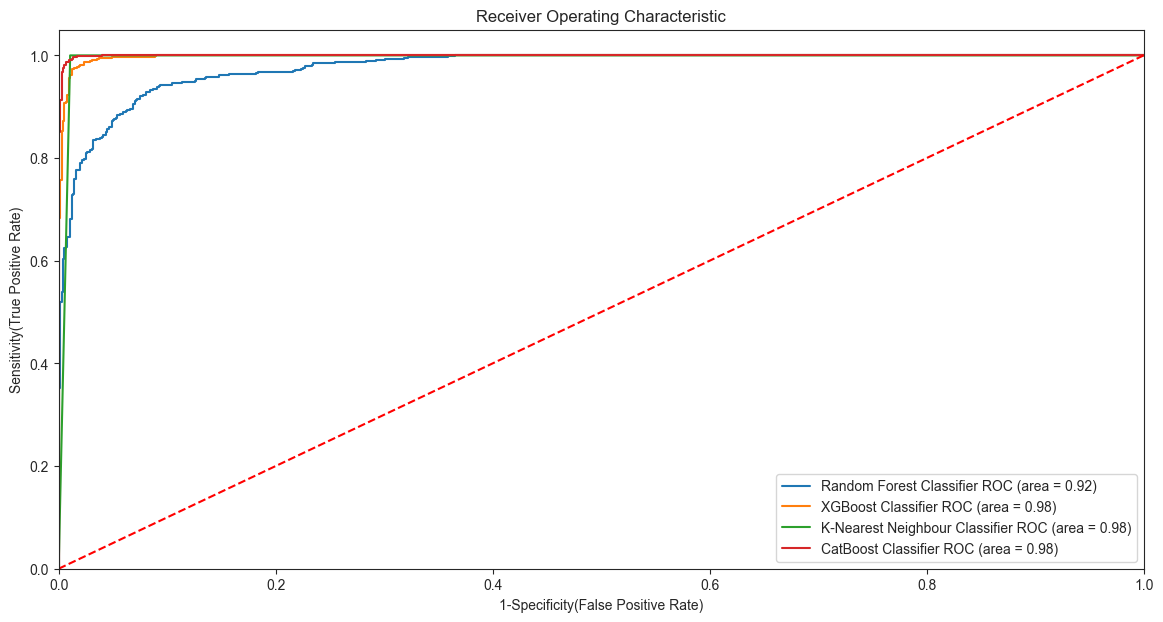

In [112]:
from sklearn.metrics import roc_auc_score,roc_curve
# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(**model_param['RF']),
    'auc': 0.9152
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    'auc': 0.9785
},
{
    'label': "K-Nearest Neighbour Classifier",
    'model': KNeighborsClassifier(**model_param['KNN']),
    'auc': 0.9842 
},
{
    'label': 'CatBoost Classifier',
    'model': CatBoostClassifier(**model_param['CatBoost'],verbose=False),
    'auc': 0.9849
},
]

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
# create loop through all model
plt.figure(figsize=(14,7))
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig(r"./images/auc.png")
plt.show()   # Display

- Catboost Classifier performs the best compared to other models. 

## Final report

In [113]:
best_model = CatBoostClassifier(**model_param['CatBoost'], verbose=False)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'CATBOOST'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'CATBOOST'
Accuracy Score value: 0.9854
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       758
           1       0.97      1.00      0.99       821

    accuracy                           0.99      1579
   macro avg       0.99      0.98      0.99      1579
weighted avg       0.99      0.99      0.99      1579



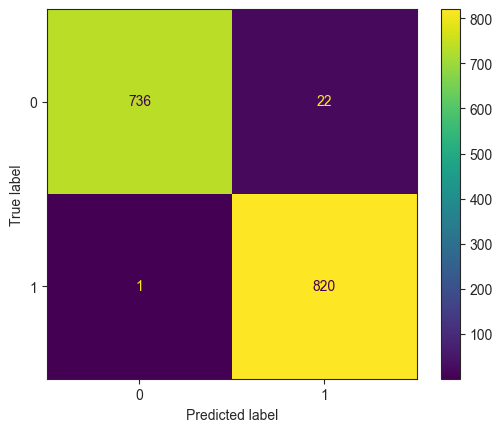

In [114]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

### Best Model is CatBoost Classifier with 98.54 % Accuracy 